In [6]:
import sys,os
# add the path to the library and load it
sys.path.insert(0, os.path.abspath("../../"))
from EPlink.Experimental_MS2_GPDC import Generate_multistate_trajectory,Gen_MS2_measurement,MS2_GPDC
from matplotlib import pyplot as plt
import numpy as np
np.random.seed(42)
from jax import numpy as jnp

In [15]:

trajlen = 300
w = 10
kappa = 0.01

kplus,kminus = 1,1
dt = 0.1/3
lambda_scale = 10/w/dt
noise_std = np.sqrt(lambda_scale*w*dt)

X,Y,loading_rates = [],[],[]
for i in range(30):
    states,traj = Generate_multistate_trajectory(kplus,kminus,2,np.ones(trajlen),dt=dt)
    loading_rate = (traj/0.5+0.5).astype(float)*lambda_scale
    xdat,ydat = Gen_MS2_measurement(loading_rate,[w,kappa,noise_std],dt,random_pol2=True)
    
    max_mindiff = 1000#np.max(ydat[2])#-np.min(ydat[2])
    
    X.append([xdat[0],xdat[1]+max_mindiff/w/dt])
    Y.append([ydat[0],ydat[1]+max_mindiff,ydat[2]+max_mindiff])
    loading_rates.append(loading_rate+max_mindiff/w/dt)
    




Deterministic
[-35.89655558  26.91668034  -9.0023189 ]
[  0.28671641  26.25379647 -10.76110612]
[ 0.31832876 23.9478253  -0.68998514]
[ 0.30207171 -2.4377903  -2.60023016]
[ 0.30568017  8.85787716 -3.65476985]
[ 0.31375468 15.9653097  -1.60867514]
[ 0.31540347 13.02284183 -1.51509841]
[ 0.3151571  15.04478829 -1.86292973]
[ 0.31676697 15.84107677 -1.66935726]
[ 0.31656987 16.39288579 -1.59011785]
[ 0.31616093 16.52183288 -1.54847326]
[ 0.31595847 16.55709345 -1.54110975]
[ 0.31597883 16.55488409 -1.54033942]
[ 0.31598138 16.55573292 -1.54042186]
[ 0.31598161 16.55577475 -1.54042345]
[ 0.31598241 16.55595239 -1.54044041]
Optimization terminated successfully    (Exit mode 0)
            Current function value: 842.928955078125
            Iterations: 16
            Function evaluations: 33
            Gradient evaluations: 16


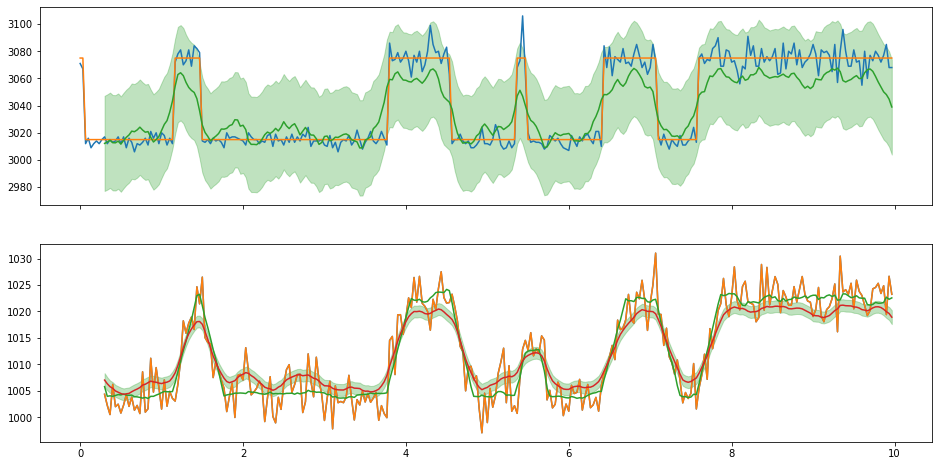

In [29]:

X_vals,Y_vals = [ydat[0] for ydat in Y],[ydat[2] for ydat in Y]
GPDC = MS2_GPDC("SE")
# out = GPDC.Fit_params(X_vals,Y_vals,[dt*w,np.sqrt(np.mean(Y_vals)),noise_std],2,batch_size=100)

i = np.random.randint(0,len(X))
xdat,ydat,loading_rate = X[i],Y[i],loading_rates[i]
mu_func,v_cov_func,MS2_mu_func,MS2_cov_func = GPDC.Get_Predfunc(np.abs(np.array([dt*w,dt.,35,noise_std])),ydat[0],ydat[2])



fig,ax = plt.subplots(2,1,figsize=(16,8),sharex=True)
ax[0].plot(xdat[0],xdat[1])
ax[0].plot(xdat[0],loading_rate)
ax[0].plot(ydat[0],mu_func(ydat[0]))
ax[0].fill_between(ydat[0],mu_func(ydat[0])-jnp.sqrt(v_cov_func(ydat[0],ydat[0])),mu_func(ydat[0])+jnp.sqrt(v_cov_func(ydat[0],ydat[0])),alpha=0.3,color="C2")

ax[1].plot(ydat[0],ydat[-1])
ax[1].plot(ydat[0],ydat[2])
ax[1].plot(ydat[0],ydat[1])
ax[1].plot(ydat[0],MS2_mu_func(ydat[0]))
ax[1].fill_between(ydat[0],MS2_mu_func(ydat[0])-jnp.sqrt(MS2_cov_func(ydat[0],ydat[0])),MS2_mu_func(ydat[0])+jnp.sqrt(MS2_cov_func(ydat[0],ydat[0])),alpha=0.3,color="C2")
